#PYTHON REVIEW

In [22]:
try:
    import controlSBML as ctl
except:
    !pip -q install controlSBML
    import controlSBML as ctl
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Created data that will be used later
CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml")
RR = CTLSB.roadrunner
DATA = RR.simulate()
DF = CTLSB.jacobian_df
MAT = DF.values

# LaTex

$\sum_i^{N} \int_0^{\infty} {\bf x}_i \frac{a}{b} dx$

Additions
1. Rules for writing reproducible SW

# The Colab Environment
* Setup
* Code and text cells
* Namespace persistence
* Formulas in text cells

# Elemental Types

* str, float, int
* list
* dict

In [6]:
a = "this is " + "a " + "string"

In [9]:
# List methods for an object with "."
a = "string"
eval("a.")

True

In [ ]:
# Find details about a method by using a.method(

In [10]:
# dictionary has a key and a value. The key provides an associate lookup.
# .keys(), .values()
 dct = {"a": 1, "b": 2}
dct["b"]

2

In [11]:
print(("keys in dictionary", dct.keys()))

('keys in dictionary', dict_keys(['a', 'b']))


# Numpy Arrays and linear algebra

* Create arrays
* Shaping arrays
* Indexing and slicing
* ``linspace``

In [12]:
arr = np.array([1, 2, 3, 4])

In [14]:
# Shape of an array
np.shape(arr)

(4,)

In [16]:
arr2 = np.reshape(arr,(4, 1))

In [18]:
arr[1], arr2[1]

(2, array([2]))

In [21]:
np.shape(arr2[1] + 2)

(1,)

In [3]:
eigen_vals, eigen_mat = np.linalg.eig(MAT)
eigen_vals

array([-5.96385198e+00+0.j        , -5.69362481e-01+0.j        ,
       -4.72123271e-01+0.j        , -4.03532170e-01+0.j        ,
       -1.77702499e-01+0.j        , -1.39402198e-11+0.j        ,
       -5.82127879e-02+0.j        , -2.00668775e-02+0.00068947j,
       -2.00668775e-02-0.00068947j, -3.07583694e-02+0.j        ])

# Plotting
* line and scatter plots
* changing the attributes of plots

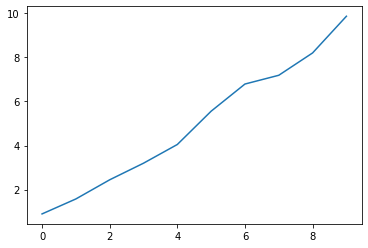

In [27]:
# Inapproriate line plot
xv = np.array(range(10))
yv = xv + np.random.rand(len(xv))
plt.plot(xv, yv)

Text(0.5, 0, 'x')

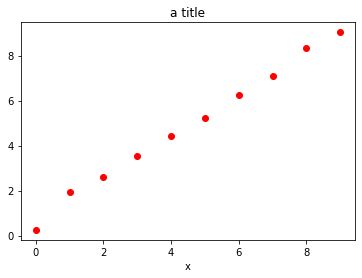

In [34]:
xv = np.array(range(10))
yv = xv + np.random.rand(len(xv))
plt.scatter(xv, yv, color="red")
_ = plt.title("a title")
plt.xlabel("x")


Other plotting packages
* seaborn (heatmaps)
* plotly

# Pandas Series and DataFrames

* Philosophy
* Series: values, index, combining series, sorting index, indexing with ``loc``, convert to array, read and write
* DataFrame: Creating with columns and values, repeat of Series

# Python flow of control

In [37]:
import pandas as pd
ser = pd.Series(np.random.rand(3), index=["a", "b","c"])
ser

a    0.595083
b    0.958291
c    0.628130
dtype: float64

In [42]:

df = pd.DataFrame(np.random.rand(3,4), columns=["a", "b","c", "d"] )
df

,a,b,c,d
0,0.586472,0.191698,0.458333,0.896418
1,0.941320,0.121300,0.723578,0.976613
2,0.955489,0.917298,0.968675,0.028748


In [46]:
dct = {v: list(np.random.rand(3)) for v in ["a", "b","c", "d"]}
dct

{'a': [0.4659384534379005, 0.347402323222736, 0.36517518642996294],
 'b': [0.4050843126869782, 0.5808759235325615, 0.16111938977169993],
 'c': [0.6389078706202647, 0.09244356893919992, 0.32567469683212047],
 'd': [0.4775427147519401, 0.10374786332902663, 0.6753008668202924]}

In [47]:
pd.DataFrame(dct)

,a,b,c,d
0,0.465938,0.405084,0.638908,0.477543
1,0.347402,0.580876,0.092444,0.103748
2,0.365175,0.161119,0.325675,0.675301


* ``if``, ``elif``, ``else``
* ``for``
* ``def`` (functions) and requirements for writing functions

# Tellurium

## Running Tellurium

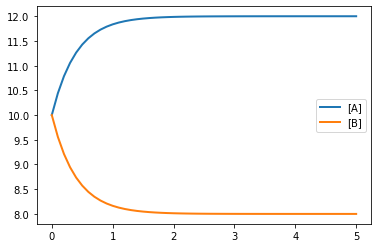

In [49]:
MDL = """
A -> B; k1*A
B -> A; k2*B

k1  = 1
k2 = 1.5
A = 10
B = 10
"""
rr = te.loada(MDL)
data = rr.simulate()
rr.plot()

$\dot{A} = k_2 B - k_1 A$

## Modifying Tellurium Constants

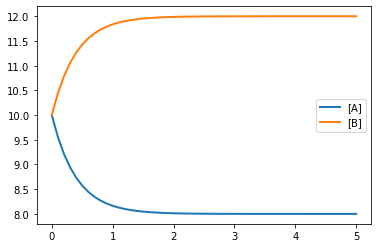

In [51]:
rr.k1 =1.5
rr.k2 = 1
rr.reset()
data = rr.simulate()
rr.plot()

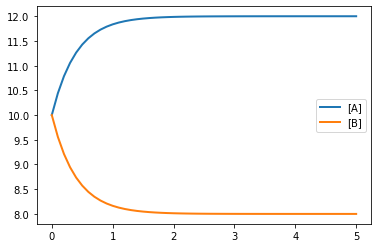

In [52]:
rr.k1 =1.5
rr.k2 = 1
rr.resetAll()
data = rr.simulate()
rr.plot()

In [55]:
rr.reset()
rr.simulate(0, 0.5)
?rr["A'"]

## Getting Species Rates

# controlSBML